In [7]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import PIL

In [2]:
# forearm_train_df = pd.read_csv('../data/train_dir_paths/...')
# forearm_valid_df = pd.read_csv('../data/valid_dir_paths/...')

In [3]:
# forearm_train_df, forearm_valid_df = train_test_split(all_xray_df, 
#                                    test_size = 0.25, 
#                                    random_state = 42

In [15]:
img_size = (32, 32)
datagen = ImageDataGenerator( 
                              horizontal_flip = True, 
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=45, 
                              shear_range = 0.1,
                              fill_mode = 'nearest',
                              zoom_range=0.20, rescale=1./255)

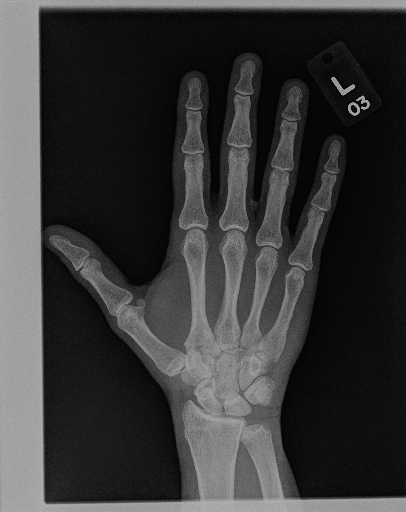

In [11]:
img = load_img('../data/train_images/HAND/negative/image27.png')
img

In [16]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='.', save_prefix='hand', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [5]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'target', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'target', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256)

test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'path',
                            y_col = 'target', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))